### Confirming if a linear model could predict the reward/value function

This notebook compares the raw feature selection from the state against the feature construction based on domain knowlegde

In [1]:
# the required imports
import numpy as np
import pandas as pd
from linear_aproximation import Model
from environment import network
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
path = '/Users/mawongh/OneDrive/REFERENCE FILE/D/Disertation/brainstorming/'
dataset = pd.read_pickle(path + 'full_dataset.pickle')

In [3]:
dataset.tail(3)

,action,reward,s_next,state
299475,121.0,-2.915486,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
299476,121.0,-3.054551,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
299477,121.0,-2.653020,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."


In [4]:
np.random.seed(1898)
N = len(dataset)
sample_sizes = np.array([N * .25, N * .40, N * .50]).astype(int)
sample_indexes = [np.random.choice(np.arange(N), size = sz, replace=False)
                 for sz in sample_sizes]
# np.random.choice(np.arange(10), size =5, replace=False)
datasets = [dataset.iloc[idx] for idx in sample_indexes]

In [5]:
datasets[2].head()

,action,reward,s_next,state
246994,53.0,-1.321689,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
158948,48.0,-3.312138,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
94346,121.0,1.044724,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
163292,74.0,-3.693729,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
95459,70.0,-6.609052,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."


In [10]:
len(y)

119791

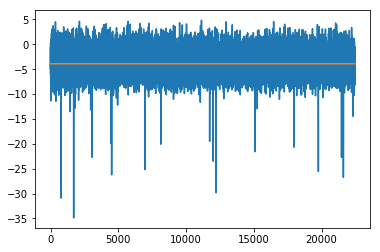

datasize: 149739
train set MSE: 7.284120294704871
test set MSE: 5.964660886626055


In [12]:
# baseline model 1 - global average
ds_idx = 2
# feature selection, only the rewards
y = datasets[ds_idx].reward.values

#splitting dataset into train/test
y_train, y_test = train_test_split(y, test_size=0.15, random_state=42)

#training the model

global_average = np.mean(y_train)

#predicting
y_hat = np.repeat(global_average, len(y_test))
x = np.arange(len(y_test))

plt.plot(x, y_test)
plt.plot(x, y_hat)
plt.show()


print('datasize: {}'.format(len(datasets[ds_idx])))

y_train_hat = np.repeat(global_average, len(y_train))
train_MSE = mean_squared_error(y_train, y_train_hat)
print('train set MSE: {}'.format(train_MSE))

test_MSE = mean_squared_error(y_test, y_hat)
print('test set MSE: {}'.format(test_MSE))

fitting model 2, based on actions...
SGDRegressor(alpha=0.001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)


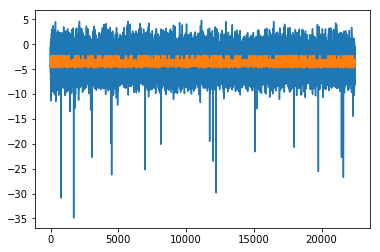

datasize: 149739
train set MSE: 7.142724889920466
test set MSE: 5.84253885387026


In [13]:
# baseline model 2 - based on actions
# ds_idx =2

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

X = enc.fit_transform(datasets[ds_idx].action.values.reshape(-1,1))
# X = np.array([model.sa2x_v1(datasets[idx].state[i], int(datasets[idx].action[i])) 
#               for i in datasets[idx].index])
y = datasets[ds_idx].reward.values

# gets the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.15, random_state=42)

reg = linear_model.SGDRegressor(alpha = 0.001, n_iter = 50)
print('fitting model 2, based on actions...')
print(reg)
reg.fit(X_train, y_train)
# print(reg.coef_)

# Do the prediction and calculate the performance (MSE) for model 1
# Xtest_transformed = scaler.transform(X_test)
# x = np.arange(len(Xtest_transformed))
x = np.arange(len(X_test))
y_hat = reg.predict(X_test)
plt.plot(x, y_test)
plt.plot(x, y_hat)
plt.show()

print('datasize: {}'.format(len(datasets[ds_idx])))
y_train_hat = reg.predict(X_train)
train_MSE = mean_squared_error(y_train, y_train_hat)
print('train set MSE: {}'.format(train_MSE))

test_MSE = mean_squared_error(y_test, y_hat)
print('test set MSE: {}'.format(test_MSE))

Constructing the features....
fitting model 3...
SGDRegressor(alpha=0.001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)


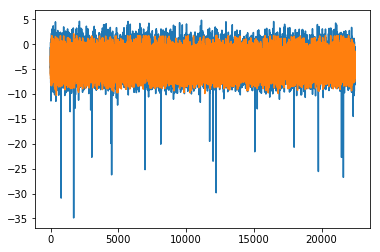

datasize: 149739
train set MSE: 3.31100900768743
test set MSE: 2.425435416183704


In [14]:
# model 3 - full linear model with domain knowledge inclusion

# ds_idx =2
# # Instantiate the model that includes the state to features implementation of the function
model = Model()

print('Constructing the features....')
X = np.array([model.sa2x_v1(datasets[ds_idx].state[i], int(datasets[ds_idx].action[i])) 
              for i in datasets[ds_idx].index])
y = datasets[ds_idx].reward.values

# gets the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.15, random_state=42)

# the linear model
reg = linear_model.SGDRegressor(alpha = 0.001, n_iter = 50)
print('fitting model 3...')
print(reg)
reg.fit(X_train, y_train)
# print(reg.coef_)

# Do the prediction and calculate the performance (MSE) for model 1
# Xtest_transformed = scaler.transform(X_test)
# x = np.arange(len(Xtest_transformed))
x = np.arange(len(X_test))
y_hat = reg.predict(X_test)
plt.plot(x, y_test)
plt.plot(x, y_hat)
plt.show()

print('datasize: {}'.format(len(datasets[ds_idx])))
y_train_hat = reg.predict(X_train)
train_MSE = mean_squared_error(y_train, y_train_hat)
print('train set MSE: {}'.format(train_MSE))

test_MSE = mean_squared_error(y_test, y_hat)
print('test set MSE: {}'.format(test_MSE))


In [ ]:
# plt.plot(dataset.index, dataset['01_step'])
# plt.show()
# plt.plot(dataset.index, dataset.reward)
# plt.show()

In [ ]:
# # Applying the function to the state and adding the location
# state = [transform(s) for s in dataset.state]
# raw_state = np.array([np.append(loc, s) for s in state])

In [ ]:
# # Instantiate the model that includes the state to features implementation of the function
model = Model()

# print(type(raw_state))
# print(type(dataset_sub1.action.values))
# i = 500
# X = model.sa2x_v1(raw_state[20], int(dataset_sub1.action[20]))
# print(X)
# # contructs the features and creates the X (features vectors) and the y (target)
# # Xraw = raw_state.copy()
idx = 0

X = np.array([model.sa2x_v1(datasets[idx].state[i], int(datasets[idx].action[i])) 
              for i in datasets[idx].index])
y = datasets[idx].reward.values

# s = [[1,2], [3,4], [5,6]]
# a = 0,15,45
# for i,j in zip(s,a):
#     print(i,j)

In [ ]:
# gets the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.15, random_state=42)

# Xraw_train, Xraw_test, yraw_train, yraw_test = train_test_split(
#                                     Xraw, y, test_size=0.10, random_state=42)

In [ ]:
# baseline model 1 - global average
global_average = np.mean(y_train)
y_hat = np.repeat(global_average, len(y_test))
x = np.arange(len(X_test))

plt.plot(x, y_test)
plt.plot(x, y_hat)
plt.show()

y_train_hat = np.repeat(global_average, len(y_train))
train_MSE = mean_squared_error(y_train, y_train_hat)
print('train set MSE: {}'.format(train_MSE))

test_MSE = mean_squared_error(y_test, y_hat)
print('test set MSE: {}'.format(test_MSE))

In [ ]:
# baseline 2 - average based on actions
df = datasets[0].groupby('action')
df2 = df.agg({'reward':'mean'})
# df2.reward[125]



In [ ]:
len(X_train)

In [ ]:
reg = linear_model.SGDRegressor(alpha = 0.001, n_iter = 50)
print('fitting model 1B...')
print(reg)
reg.fit(X_train, y_train)
# print(reg.coef_)

# Do the prediction and calculate the performance (MSE) for model 1
# Xtest_transformed = scaler.transform(X_test)
# x = np.arange(len(Xtest_transformed))
x = np.arange(len(X_test))
y_hat = reg.predict(X_test)
plt.plot(x, y_test)
plt.plot(x, y_hat)
plt.show()

y_train_hat = reg.predict(X_train)
train_MSE = mean_squared_error(y_train, y_train_hat)
print('train set MSE: {}'.format(train_MSE))

test_MSE = mean_squared_error(y_test, y_hat)
print('test set MSE: {}'.format(test_MSE))

In [ ]:
# Do the prediction and calculate the performance (MSE) for model 1
print('Model with the raw state vector')
x = np.arange(len(Xraw_test))
yraw_hat = regraw.predict(Xraw_test)
plt.plot(x, yraw_test)
plt.plot(x, yraw_hat)
plt.show()

test_MSE = mean_squared_error(yraw_test, yraw_hat)
print('test set MSE: {}'.format(test_MSE))

yraw_train_hat = regraw.predict(Xraw_train)
train_MSE = mean_squared_error(yraw_train, yraw_train_hat)
print('train set MSE: {}'.format(train_MSE))

In [17]:
comp = pd.read_csv(path + 'linear_model_comparison.csv')

In [18]:
comp

,algorithm,sample_size,75K,75K .1,75K .2,75K .3,120K,120K .1,120K .2,120K .3,150K,150K .1,150K .2,150K .3
0,baseline 1,Train MSE,9.180,7.074,8.208950,8.905490,7.750,8.602,7.555,8.700,8.439,7.752300,8.651490,7.284120
1,baseline 1,Test MSE,6.670,6.014,6.223136,6.192756,6.004,5.918,7.359,11.972,8.583,6.925600,8.679630,5.964661
2,baseline 2,Train MSE,9.040,6.935,8.071200,8.763782,7.600,8.463,7.431,8.561,8.308,7.622000,8.515600,7.142725
3,baseline 2,Test MSE,6.570,5.902,6.093730,6.078754,5.870,5.795,7.216,11.856,8.465,6.790610,8.601821,5.842539
4,linear model,Train MSE,4.795,2.952,4.005590,4.665064,3.706,4.469,3.525,4.670,4.488,3.797240,4.631140,3.311009
5,linear model,Test MSE,3.492,2.550,2.845814,2.803768,2.390,2.497,3.947,8.498,4.974,3.339766,5.290519,2.425435


In [48]:
import seaborn as sns

In [49]:
comp_2 = pd.melt(comp, id_vars=['algorithm', 'sample_size'], value_name='mse')
# comp_2['datasample_sz'] = [lambda x:x.split('.')[0] for x in comp_2.variable]
comp_2['datasample_sz'] = [val.split(' ')[1] for val in comp_2['variable'].values]
comp_2.head()

,algorithm,sample_size,variable,mse,datasample_sz
0,baseline 1,Train MSE,75K,9.180,75K
1,baseline 1,Test MSE,75K,6.670,75K
2,baseline 2,Train MSE,75K,9.040,75K
3,baseline 2,Test MSE,75K,6.570,75K
4,linear model,Train MSE,75K,4.795,75K


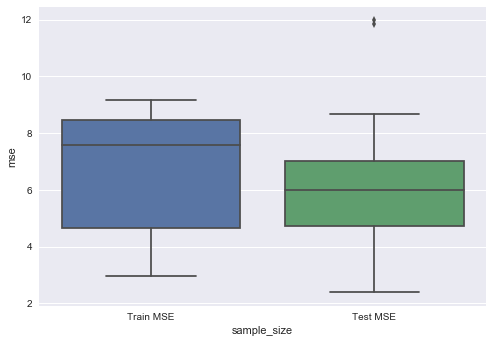

In [50]:
sns.boxplot(x="sample_size", y="mse", data=comp_2)
plt.show()